In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
os.getcwd()

'C:\\Users\\陈方舟\\Desktop\\Python\\狗熊会\\code'

In [3]:
comm_attri = pd.read_excel("commAttri.xlsx", index_col = 0, encoding = "UTF-8") # 读取爬取的数据
comm_attri.head()

,minTime,Ncmts,prodName,category,itemTagList,promTag,productPlace,price
itemId,,,,,,,,
1006001,2015-11-05,50893,日式多功能颈枕 针织款,居家,爆品,NaN,NaN,69.0
1006051,2015-12-17,59030,2条装 轻柔无捻毛巾 - 轻软亲肤，热销50万条,洗护,NaN,NaN,NaN,59.0
1006058,2015-11-16,60783,懒人抹布 - 吸水吸油，热销200万卷,餐厨,满折,NaN,NaN,13.2
1021000,2016-03-23,47766,埃及进口长绒棉毛巾 - 厚实大毛圈，干爽瞬吸,洗护,满额减,NaN,NaN,32.0
1021020,2016-05-06,68734,2条装 男式基础平角内裤,服装,NaN,NaN,NaN,47.2


In [4]:
# 读取文件中的数据内容。
Folder_Path = u"C:\\Users\\陈方舟\\Desktop\\Python\\狗熊会\\code\\csv-cmtDtl"  # 要拼接的文件夹及其完整路径
SaveFile_Path = u"C:\\Users\\陈方舟\\Desktop\\Python\\狗熊会\\code"  # 拼接后要保存的文件路径
SaveFile_Name = u'cmtDtl.csv'   # 合并后要保存的文件名

# 将该文件夹下的所有文件名存入一个列表
file_list = os.listdir(u"C:\\Users\\陈方舟\\Desktop\\Python\\狗熊会\\code\\csv-cmtDtl")

# 读取第一个CSV文件并包含表头
f = open(Folder_Path + '\\' + file_list[0], encoding = "ANSI")
df = pd.read_csv(f) # 文件名带有中文，直接读取会报错
# 将读取的第一个CSV文件写入合并后的文件保存
df.to_csv(SaveFile_Path + '\\' + SaveFile_Name, index=False)

# 循环遍历列表中每个csv文件，并追加到合并后的文件
for i in range(1, len(file_list)):
    f = open(Folder_Path + '\\' + file_list[i], encoding = "ANSI")
    df = pd.read_csv(f)
    df.to_csv(SaveFile_Path + '\\' + SaveFile_Name, index=False, header=False, mode='a+')

# 读取全部数据
cmt = pd.read_csv('cmtDtl.csv')

In [5]:
cmt.head()

,itemId,star,content,createTime
0,1006001,5,好用面是棉布来的，内芯柔软，用起来好舒服，亲肤感很好，第二次买了,2018-05-23 18:02:18
1,1006001,5,好用，比小饰品店的货做工好，也设计得更合理，外形朴素好看，颈椎劳损者乘飞机必备。,2018-07-03 21:11:40
2,1006001,5,买了好长时间了，蛮舒服的，比无印的性价比高～出去旅行带着应该会很方便,2018-06-24 18:47:33
3,1006001,5,之前想买条纹款的，没注意拍成了纯色款，一样大爱！作为严选新用户，真是觉得严选太好了,2018-04-21 11:16:13
4,1006001,5,第一次在无印良品看见这个颈枕，摸着好舒服，看评价说跟muji差不多，就买了，还行吧！,2018-04-11 21:25:05


In [6]:
len(cmt)

8749227

In [7]:
cmt.groupby('itemId')[['star']].count()

,star
itemId,
1006001,50893
1006006,11436
1006007,5355
1006013,5795
1006014,3848
1006048,4913
1006051,59030
1006053,9838
1006054,3710


In [8]:
# 过滤评分star的缺失值
cmt_star = cmt[cmt['star'] > 0]

In [9]:
len(cmt_star)

6787363

In [10]:
star =  cmt_star.groupby('itemId')[['star']].mean()
star.columns = ['star']
star

,star
itemId,
1006001,4.927577
1006006,4.914133
1006007,4.930605
1006013,4.937391
1006014,4.912199
1006048,4.943729
1006051,4.910511
1006053,4.947664
1006054,4.943532


In [13]:
item.describe()

,itemId,star,content,createTime
count,2.930000e+03,2930.000000,2930.000000,2930.000000
mean,1.348232e+06,2986.084300,2975.313993,2986.084300
std,2.415456e+05,7745.707492,7715.165311,7745.707492
min,1.006001e+06,1.000000,0.000000,1.000000
25%,1.152102e+06,55.000000,55.000000,55.000000
50%,1.319502e+06,474.000000,473.000000,474.000000
75%,1.523023e+06,2736.750000,2726.750000,2736.750000
max,3.396000e+06,183683.000000,182690.000000,183683.000000


In [12]:
item = cmt.groupby(['itemId']).count().reset_index()
item.sort_values(by = ['content'], ascending = False)

,itemId,star,content,createTime
318,1114010,183683,182690,183683
412,1127007,95177,94770,95177
73,1037001,81015,80560,81015
884,1165015,76030,75864,76030
547,1135047,75544,75277,75544
445,1129016,72884,72615,72884
24,1021020,68734,68587,68734
270,1108028,66913,66591,66913
384,1124015,61089,60754,61089
11,1006058,60783,60648,60783


In [14]:
# 去掉评分star数量小于100的商品
item_filted = item[item['star'] > 99].reset_index()
item_filted

,index,itemId,star,content,createTime
0,0,1006001,50893,50798,50893
1,1,1006006,11436,11411,11436
2,2,1006007,5355,5341,5355
3,3,1006013,5795,5784,5795
4,4,1006014,3848,3837,3848
5,5,1006048,4913,4897,4913
6,6,1006051,59030,58918,59030
7,7,1006053,9838,9794,9838
8,8,1006054,3710,3705,3710
9,9,1006056,8628,8613,8628


In [15]:
len(item_filted)

2021

In [16]:
cmt_filted = cmt.loc[cmt['itemId'].isin(item_filted['itemId'])]
cmt_filted

,itemId,star,content,createTime
0,1006001,5,好用面是棉布来的，内芯柔软，用起来好舒服，亲肤感很好，第二次买了,2018-05-23 18:02:18
1,1006001,5,好用，比小饰品店的货做工好，也设计得更合理，外形朴素好看，颈椎劳损者乘飞机必备。,2018-07-03 21:11:40
2,1006001,5,买了好长时间了，蛮舒服的，比无印的性价比高～出去旅行带着应该会很方便,2018-06-24 18:47:33
3,1006001,5,之前想买条纹款的，没注意拍成了纯色款，一样大爱！作为严选新用户，真是觉得严选太好了,2018-04-21 11:16:13
4,1006001,5,第一次在无印良品看见这个颈枕，摸着好舒服，看评价说跟muji差不多，就买了，还行吧！,2018-04-11 21:25:05
5,1006001,5,非常舒服，买来就戴着它去巴黎，在飞机上十几个小时全靠它保护我的头部，枕着很舒服。,2018-03-30 12:41:32
6,1006001,5,很柔软的，一点点味道，阳台上晒一天就好了。旅游的时候可以用，午睡也可以用，满意,2018-04-09 10:45:26
7,1006001,5,送我至剡溪新坡去无锡依然在一起我婆婆XP在一起在一起破hhjdndhxj,2018-05-17 18:29:53
8,1006001,5,手感超级舒服！出去玩带着 简直拯救了飞机和高铁时间。和眼罩正好一套 简单好看！,2018-04-03 01:52:49
9,1006001,5,用起来很厚实，特别舒服。价格也不贵，真的跟muji的差不多，很喜欢！还会继续在严选上买买买的！,2018-03-19 10:48:29


In [17]:
star_temp = cmt_star.loc[cmt_star['itemId'].isin(item_filted['itemId'])]
star_rating = star_temp.groupby(['itemId']).mean().reset_index()
star_rating.sort_values(by = ['star'], ascending = False)

,itemId,star
1998,1652016,5.000000
1992,1649004,5.000000
1757,1532016,5.000000
1685,1512028,5.000000
1633,1503003,4.996226
976,1225018,4.994475
1902,1579052,4.994350
2001,1653000,4.991736
1361,1418010,4.990654
1233,1327015,4.989399


In [18]:
star_rating.head()

,itemId,star
0,1006001,4.927577
1,1006006,4.914133
2,1006007,4.930605
3,1006013,4.937391
4,1006014,4.912199


In [19]:
star_rating.describe()

,itemId,star
count,2.021000e+03,2021.000000
mean,1.289304e+06,4.898988
std,1.844201e+05,0.074595
min,1.006001e+06,4.267717
25%,1.134033e+06,4.875289
50%,1.241013e+06,4.920128
75%,1.466004e+06,4.947071
max,1.686005e+06,5.000000


In [53]:
len(star_rating)

2021

In [20]:
len(item_filted)

2021

In [21]:
star_temp.head()

,itemId,star,content,createTime
0,1006001,5,好用面是棉布来的，内芯柔软，用起来好舒服，亲肤感很好，第二次买了,2018-05-23 18:02:18
1,1006001,5,好用，比小饰品店的货做工好，也设计得更合理，外形朴素好看，颈椎劳损者乘飞机必备。,2018-07-03 21:11:40
2,1006001,5,买了好长时间了，蛮舒服的，比无印的性价比高～出去旅行带着应该会很方便,2018-06-24 18:47:33
3,1006001,5,之前想买条纹款的，没注意拍成了纯色款，一样大爱！作为严选新用户，真是觉得严选太好了,2018-04-21 11:16:13
4,1006001,5,第一次在无印良品看见这个颈枕，摸着好舒服，看评价说跟muji差不多，就买了，还行吧！,2018-04-11 21:25:05


In [22]:
star_sales = pd.concat([star_rating, item_filted['star']], axis = 1)
star_sales.columns = ['itemId','star','sales']
star_sales

,itemId,star,sales
0,1006001,4.927577,50893
1,1006006,4.914133,11436
2,1006007,4.930605,5355
3,1006013,4.937391,5795
4,1006014,4.912199,3848
5,1006048,4.943729,4913
6,1006051,4.910511,59030
7,1006053,4.947664,9838
8,1006054,4.943532,3710
9,1006056,4.950535,8628


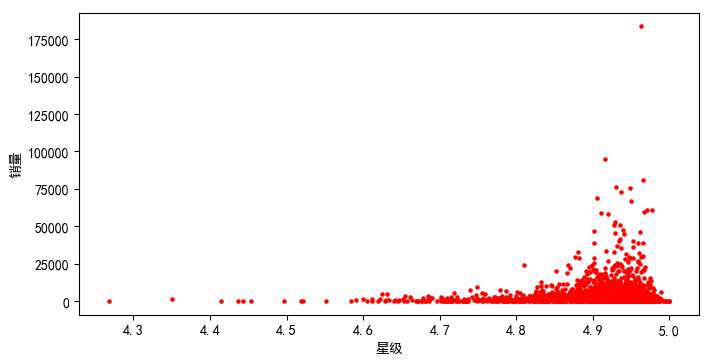

In [23]:
fig, ax = plt.subplots(figsize=(8,4), dpi=100)
ax.scatter(star_sales['star'], star_sales['sales'], s=5, color='red')
ax.set_xlabel('星级')
ax.set_ylabel('销量')
# ax.set_title('星级对销量的影响')
plt.show()

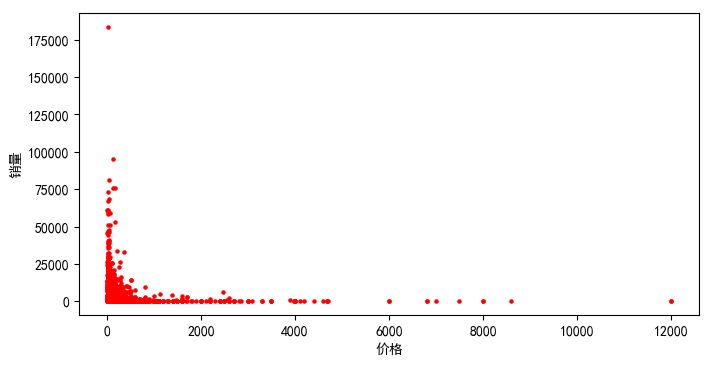

In [25]:
fig, ax = plt.subplots(figsize=(8,4), dpi=100)
ax.scatter(comm_attri['price'], comm_attri['Ncmts'], s=5, color='red')
ax.set_xlabel('价格')
ax.set_ylabel('销量')
# ax.set_title('价格对销量的影响')
plt.show()

In [26]:
comm_attri.sort_values(by = ['price'], ascending = False).head(50)

,minTime,Ncmts,prodName,category,itemTagList,promTag,productPlace,price
itemId,,,,,,,,
1622007,2018-06-18,29,网易智造太空舱按摩大师椅 - 网易智造按摩椅销售冠军,特色区,限时购,限时购,NaN,11999.0
1622007,2018-06-18,29,网易智造太空舱按摩大师椅,居家,限时购,限时购,NaN,11999.0
1356017,2017-11-20,12,豪斯 全真皮功能沙发,居家,NaN,NaN,NaN,8599.0
1451010,2017-12-17,328,网易智造智能感体按摩椅,居家,NaN,NaN,NaN,7999.0
1451010,2017-12-17,328,网易智造智能感体按摩椅 - 由头到脚享受360度舒适体验,特色区,NaN,NaN,NaN,7999.0
1501017,2018-04-26,84,舒压奢享按摩椅,居家,NaN,NaN,NaN,7499.0
1242015,2017-10-13,134,艾米 真皮沙发,居家,NaN,NaN,NaN,6999.0
1283028,2017-10-01,35,羽画 真皮沙发,居家,NaN,NaN,NaN,6799.0
1375002,2017-11-25,10,韵白系列沙发组合（单人位+三人位）,居家,NaN,NaN,NaN,6799.0


In [101]:
comm_attri.sort_values(by = ['price'], ascending = True).head(50)

,minTime,Ncmts,prodName,category,itemTagList,promTag,productPlace,price,GMV
itemId,,,,,,,,,
1194001,2017-06-13,3804,1副装 猎人狼杀 扑克牌 - 多种玩法，桌游必备,文体,NaN,NaN,NaN,3.9,14835.6
1059011,2016-08-20,6650,变色固体胶 - 光感消色，操作无痕,文体,NaN,NaN,NaN,3.9,25935.0
1158009,2017-11-07,2912,15cm铝直尺 - 超轻铝制，防滑耐用,文体,NaN,NaN,NaN,4.9,14268.8
1059012,2016-08-22,7420,可移固体胶 - 一胶多用，数次粘贴,文体,NaN,NaN,NaN,4.9,36358.0
1156064,2017-07-24,13470,棉质生活 芦荟温和湿巾,洗护,NaN,NaN,NaN,4.9,66003.0
1197015,2017-10-27,3909,儿童橡皮筋 - 彩虹弹力橡皮筋,婴童,NaN,NaN,NaN,4.9,19154.1
1411000,2017-11-03,132,网易充值一卡通 点卡 - 官方品质，安全快速优惠,文体,NaN,NaN,NaN,5.0,660.0
1450009,2018-06-16,802,可擦 中性笔 - 痕迹清除，一擦就改,文体,NaN,NaN,NaN,5.9,4731.8
1124015,2017-03-04,61089,12包/条 谷风一木4层印花手帕纸,洗护,NaN,NaN,NaN,5.9,360425.1


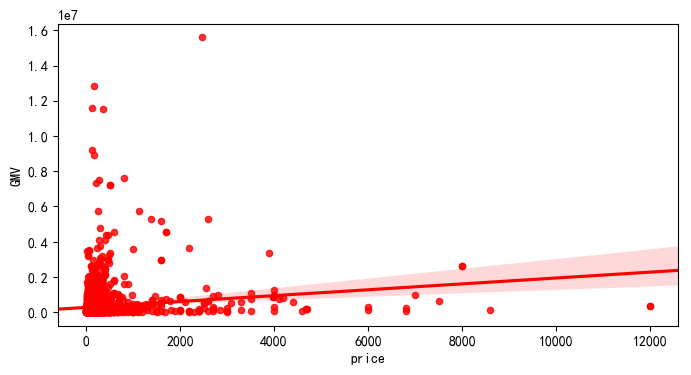

In [27]:
import seaborn as sns

comm_attri['GMV'] = comm_attri['Ncmts'] * comm_attri['price']

fig, ax = plt.subplots(figsize=(8,4), dpi=100)
sns.regplot(x = 'price', y = 'GMV', data = comm_attri, color = 'red', scatter_kws={'s': 20})